In [1]:
sin(2)

0.9092974268256817

In [2]:
function runge_kutta(t0, x0, h, N, f)
    
    dimension = length(x0)
    
    t_actual = t0
    x_actual = x0
    
    ts = zeros(N)
    xs = zeros(N, dimension)
    
    for i in 1:N
        k1 = f(t_actual, x_actual)
        k2 = f(t_actual + h/2, x_actual + h*k1/2)
        k3 = f(t_actual + h/2, x_actual + h*k2/2)
        k4 = f(t_actual + h, x_actual + h*k3)
        
        K = (k1 + 2k2 + 2k3 + k4)/6
        
        t_nuevo = t_actual + h
        x_nuevo = x_actual + h*K
        
        t_actual = t_nuevo
        x_actual = x_nuevo
        
        ts[i] = t_actual
        xs[i, :] = x_actual
    end
    xs
end

runge_kutta (generic function with 1 method)

In [3]:
function ejemplo1(t, X)
    R, F = X
    
    return [2R - 1.2R*F, -F + 0.9R*F]
end

ejemplo1 (generic function with 1 method)

In [4]:
runge_kutta(0, [1, 0.5], 0.0625, 100, ejemplo1)

100x2 Array{Float64,2}:
 1.09154  0.498147
 1.1915   0.498979
 1.30039  0.502756
 1.41866  0.509808
 1.54667  0.520551
 1.6846   0.53551 
 1.83245  0.555346
 1.9899   0.580884
 2.15621  0.613158
 2.3301   0.653451
 2.50953  0.703356
 2.69155  0.764819
 2.87205  0.840196
 ⋮                
 2.09873  0.601355
 2.27022  0.63876 
 2.44805  0.685196
 2.62959  0.742486
 2.81115  0.812841
 2.98772  0.898895
 3.1528   1.00369 
 3.29829  1.13058 
 3.41462  1.28299 
 3.49118  1.46394 
 3.51736  1.67532 
 3.48401  1.91691 

Dibujemos un poquito:

In [5]:
using PyPlot

INFO: Loading help data...


In [6]:
using PyPlot

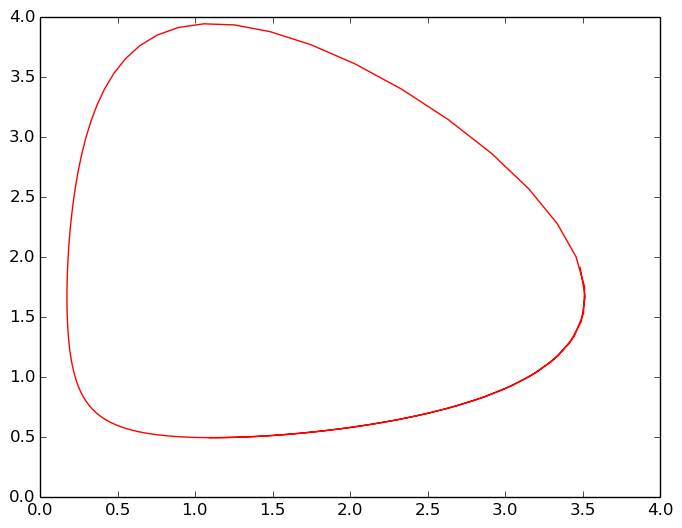

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f08dfed0a10>

In [7]:
solucion_ejemplo1 = runge_kutta(0, [1, 0.5], 0.0625, 100, ejemplo1)
ejem_solx = solucion_ejemplo1[:, 1]
ejem_soly = solucion_ejemplo1[:, 2]
plot(ejem_solx, ejem_soly, "r")

'inche oscilador armónico.

In [8]:
function oscilador(t, X)
    x, y = X
    
    return [y, -4x]
end

oscilador (generic function with 1 method)

In [9]:
runge_kutta(0, [5, 0], 0.0625, 100, oscilador)

100x2 Array{Float64,2}:
  4.96099   -1.24674
  4.84456   -2.47403
  4.65254   -3.66272
  4.38791   -4.79425
  4.05482   -5.85096
  3.65845   -6.81638
  3.20499   -7.67542
  2.70152   -8.4147 
  2.15589   -9.02266
  1.57662   -9.48984
  0.972752  -9.80892
  0.353701  -9.97494
 -0.270869  -9.98531
  ⋮                 
  0.64521    9.91637
  1.25834    9.67811
  1.85182    9.28884
  2.41642    8.75461
  2.9433     8.08378
  3.42426    7.28679
  3.85178    6.37611
  4.21919    5.36592
  4.52077    4.272  
  4.7518     3.11142
  4.90869    1.90229
  4.98897    0.66347

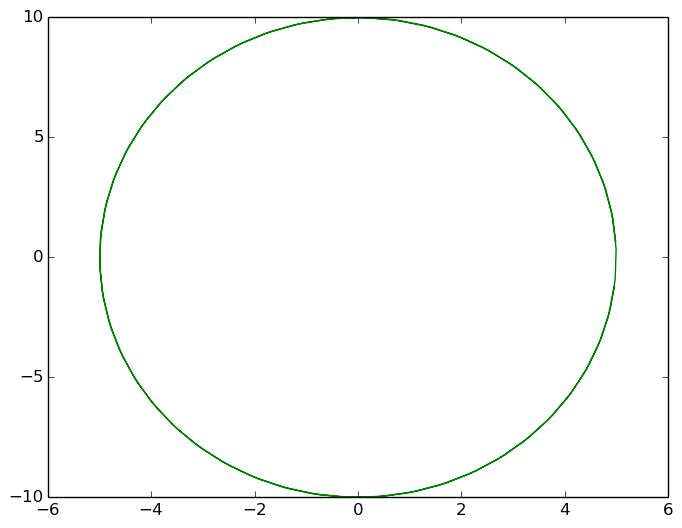

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f08a8039110>

In [10]:
solucion_ejemplo2 = runge_kutta(0, [5, 0], 0.0625, 100, oscilador)
ejem_solx = solucion_ejemplo2[:, 1]
ejem_soly = solucion_ejemplo2[:, 2]
plot(ejem_solx, ejem_soly, "g")

Mo, proviamoci sta megaviglia con Lorenz:

In [11]:
function Lorenz(t, X)
    x, y, z = X
    
    return [10*(y - x), 28x - y - x*z, -8z/3 + x*y]
end

Lorenz (generic function with 1 method)

In [12]:
runge_kutta(0, [0, 1, 0], 0.0625, 100, Lorenz)

100x3 Array{Float64,2}:
   0.523014    1.42117   0.0193519
   1.23993     2.78224   0.121714 
   2.62746     5.73132   0.568317 
   5.43495    11.6334    2.46846  
  10.7291     21.4746    9.85308  
  17.7891     27.296    29.8714   
  18.459      10.8532   47.4222   
  10.1959     -5.65149  41.5259   
   1.7411     -8.65785  32.7301   
  -2.97037    -8.14501  28.1656   
  -5.29257    -7.98702  25.8225   
  -6.6573     -8.54687  24.7234   
  -7.77195    -9.51091  24.6969   
   ⋮                              
  -7.2485     -5.31419  28.0411   
  -6.34675    -5.4343   25.7916   
  -6.12183    -6.30357  23.9035   
  -6.55436    -7.73174  22.7722   
  -7.55472    -9.53059  22.7802   
  -8.9286    -11.2371   24.2525   
 -10.2399    -11.9448   27.0358   
 -10.8191    -10.8476   29.9319   
 -10.2306     -8.41502  31.2308   
  -8.78373    -6.19084  30.3967   
  -7.25947    -5.13034  28.2831   
  -6.24829    -5.18563  25.8968   

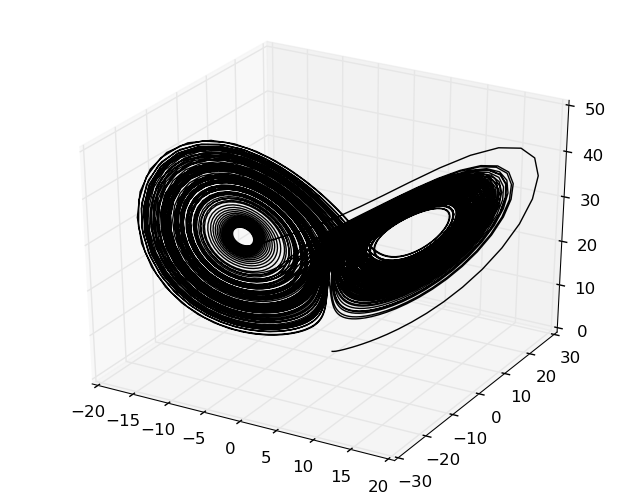

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f08a2fd3690>

In [13]:
solucion_ejemplo3 = runge_kutta(0, [0, 1, 0], 0.015625, 10000, Lorenz)
ejem_solx = solucion_ejemplo3[:, 1]
ejem_soly = solucion_ejemplo3[:, 2]
ejem_solz = solucion_ejemplo3[:, 3]
plot3D(ejem_solx, ejem_soly, ejem_solz, "k")

In [14]:
bits(0.0625)

"0011111110110000000000000000000000000000000000000000000000000000"

In [15]:
1/(64)

0.015625

Ve lo giuro guagliù non so perche oggi si è camminato, comunque state senza pensieri!! [:-) ](https://www.youtube.com/watch?v=OjdofQRNfR0) 


[ XD ](https://www.youtube.com/watch?v=-v2mvO7Yq48)